# Laboration - Covid-19

---

## Uppgift 1

### a)

Inläsning av data:

In [4]:
import pandas as pd

covid19_cases = pd.read_excel("./Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

Utforskande av data:

In [5]:
covid19_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [6]:
covid19_cases.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [7]:
covid19_cases.head(5)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


### b)

In [8]:
covid19_cases["Vecka"] = covid19_cases["år"].apply(str) + "v" + covid19_cases["veckonummer"].apply(str)

# verify data of new column "Vecka" with random rows
covid19_cases[["år", "veckonummer", "Vecka"]].sample(5)

,år,veckonummer,Vecka
104,2022,5,2022v5
119,2022,20,2022v20
48,2021,1,2021v1
101,2022,2,2022v2
71,2021,24,2021v24


### c)



Då uppgift *1 c* t o m *f* är av likartad natur skapade jag funktionen `generate_graphs()` som genererar grafer. För att enklare kunna skapa linjediagram med flera oberoende linjer använder funktionen Pandas [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) för att omforma datan, efter ett [förslag](https://stackoverflow.com/a/55579762) på Stack Overflow. För att bli av med titeln "variable" i *legend*-rutan som visas i Seaborn-grafen (om flera linjer förekommer), följde jag detta [förslag](https://stackoverflow.com/questions/51579215/remove-seaborn-lineplot-legend-title/51579663#comment114417449_64346251) på Stack Overflow.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

def generate_graphs(df, files_name, x, y, y_label, title=None):
    # general styling
    plt.figure(figsize=(10, 5))
    sns.set_style("darkgrid")

    # if user was to lazy to make single item list
    if type(y) is str:
        y = [y]

    # if user provided a dictionary as y, use dictionary for renaming
    elif type(y) is dict:
        df = df.rename(columns=y)
        y = y.values()        

    melted_df = pd.melt(df, value_vars=y, id_vars=x)


    if len(y) > 1:
        color = "variable"
    else:
        color = None

    ax = sns.lineplot(data=melted_df, x=x, y="value", hue=color)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xticks(range(0, len(covid19_cases), 26))
    ax.set_xticklabels(["2020v6", "2020v32", "2021v6", "2021v32", "2022v6", "2022v32"])

    # Remove title "variable" from legend box
    if len(y) > 1:
        ax.get_legend().set_title(None)
    
    plt.savefig(f"./Visualiseringar/{files_name}.png")

    
    fig = px.line(melted_df.rename(columns={"value": y_label}), 
                  x="Vecka", y=y_label,
                  color=color,
                  hover_name=x, 
                  hover_data={x: False, "variable": False},
                  title=title)
    #fig.update_layout(legend={"orientation":"h", "title": None, "x": 0.05, "y": 1.1})
    fig.update_layout(legend={"title": None})
    fig.show()

    # export graph as static web page
    fig.write_html(f"./Visualiseringar/{files_name}.html")

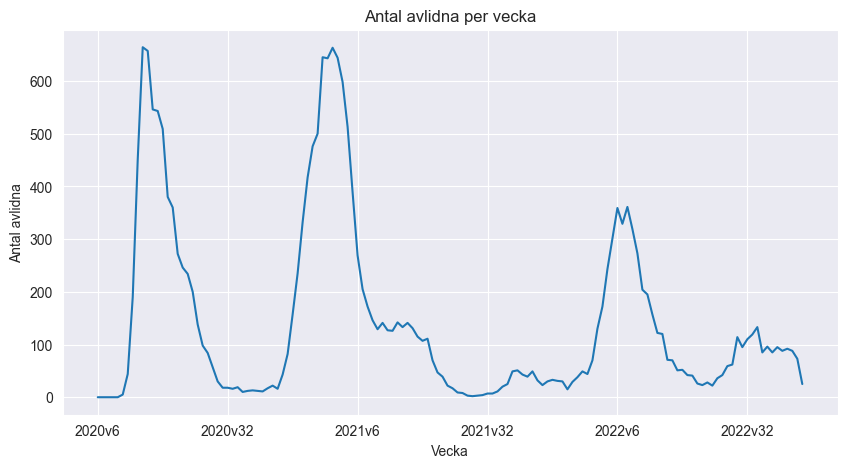

In [10]:
generate_graphs(df=covid19_cases, files_name="antal_avlidna_vecka",
                x="Vecka", y="Antal_avlidna_vecka",
                y_label="Antal avlidna",
                title="Antal avlidna per vecka")

### d)

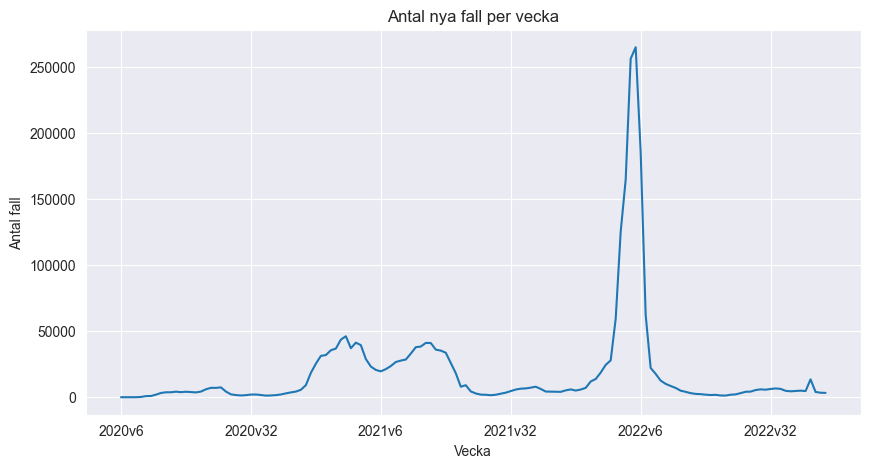

In [11]:
generate_graphs(df=covid19_cases, files_name="antal_fall_vecka",
                x="Vecka", y="Antal_fall_vecka",
                y_label="Antal fall",
                title="Antal nya fall per vecka")

### e)

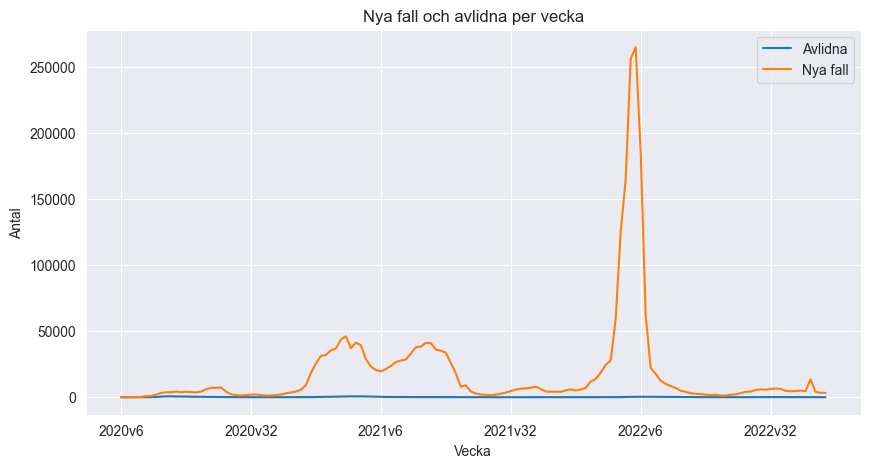

In [12]:
generate_graphs(df=covid19_cases, files_name="antal_fall_och_avlidna_vecka",
                x="Vecka", 
                # setting y to a dictionary will rename the columns
                y={"Antal_avlidna_vecka": "Avlidna", "Antal_fall_vecka": "Nya fall"},
                y_label="Antal",
                title="Nya fall och avlidna per vecka")

### f)

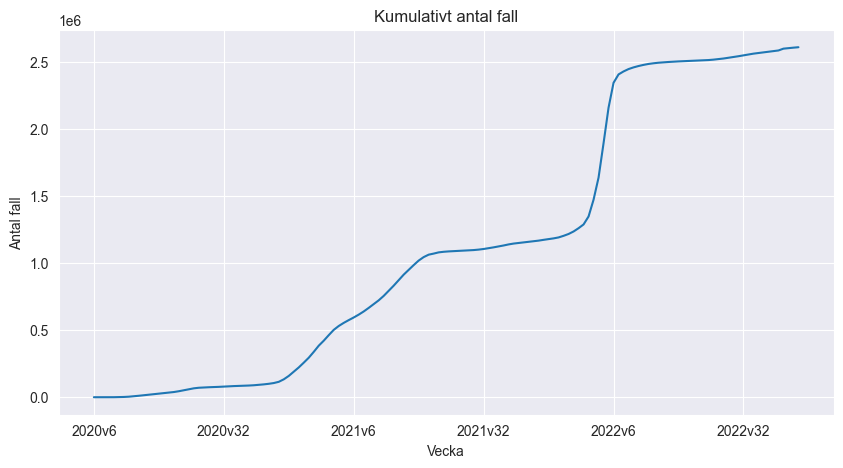

In [13]:
generate_graphs(df=covid19_cases, files_name="kumulativt_antal_fall",
                x="Vecka", y="Kum_antal_fall",
                y_label="Antal fall",
                title="Kumulativt antal fall")

---

## Uppgift 2

Läs in Excel-arbetsbok och kika lite på innehållet:

In [14]:
vaccination = pd.read_excel("./Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
vaccination.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [15]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


### Uppgift 2 a)

In [16]:
counties = vaccination["Län"].dropna().unique()
print(f"Det finns {counties.size} län representerade i datasetet.")

Det finns 21 län representerade i datasetet.


### Uppgift 2 b)

In [17]:
municipalities = vaccination["Kommun"].dropna().unique()
print(f"Det finns {municipalities.size} kommuner representerade i datasetet.")

Det finns 290 kommuner representerade i datasetet.


### Uppgift 2 c)

In [18]:
population = int(vaccination["Befolkning"].sum())
print(f"Befolkningen som är representerad i datasetet uppgår till {population}.")

Befolkningen som är representerad i datasetet uppgår till 9092790.


### Uppgift 2 d)

Följande antaganden gjordes för denna uppgift:
- Att de angivna befolkningningstalen i kolumnen *Befolkning* i [Folkhalsomyndigheten_Covid19_Vaccine.xlsx](./Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx) var aktuella någon gång kring 27 oktober år 2022. Detta antagande kommer ur att det i samma arbetsbok finns ett arbetsblad som heter *FOHM 27 OKT 2022*.

In [144]:
age_groups = vaccination.groupby("Ålder").agg(
    befolkning = pd.NamedAgg(column="Befolkning", aggfunc="sum")
)
adult_age_groups = age_groups["18-29":]
adults_count = adult_age_groups["befolkning"].sum()
adults_count

8347420

För att få reda på den totala befolkningen i Sverige var under oktober 2022 använder jag arbetsboken [e0101__manad_befstat_2023m09.xlsx](./Lab/Data\/e0101__manad_befstat_2023m09.xlsx) som hämtats från SCB:s hemsida ([Befolkningsstatistik 2020-2023 (månad) och 1998-2022 (år)](https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/folkmangd-och-befolkningsforandringar---manad-kvartal-och-halvar/befolkningsstatistik-2020-2023-manad-och-1998-2022-ar/)).

In [145]:
scb_population = pd.read_excel("./Data/be0101__manad_befstat_2023m09.xlsx", 
                               sheet_name="Totalt Total",
                               header=11, names=["Månad", "Befolkning"],
                               usecols="A:B")
# look for the correct row (index) manually
scb_population.head(30)

,Månad,Befolkning
0,2023 (preliminär statistik preliminary statist...,NaN
1,Okänt Unknown,.
2,Januari January,10526593
3,Februari February,10529971
4,Mars March,10533285
5,April April,10536536
6,Maj May,10541150
7,Juni June,10545179
8,Juli July,10549251
9,Augusti August,10555069


In [146]:
# it was row 25
total_population = scb_population.loc[25, "Befolkning"]
display(total_population)

children_count = total_population - adults_count
print(f"Det fanns (uppskattningsvis) {children_count} barn i Sverige i oktober 2022.")

10519592

Det fanns (uppskattningsvis) 2172172 barn i Sverige i oktober 2022.


### e)

Ett åldersspan saknas i `age_groups`, nämligen åldern `"0-11"`:

In [147]:
age_groups

,befolkning
Ålder,
12-15,503831
16-17,241539
18-29,1475950
30-39,1467590
40-49,1298156
50-59,1339798
60-69,1121922
70-79,1033113
80-89,496750


In [156]:
# caculate children of age 0-11 count
age_0_11_count = children_count - age_groups.loc["12-15":"16-17", "befolkning"].sum()

# add the missing age span and count
age_groups.loc["0-11", "befolkning"] = age_0_11_count
age_groups.sort_index(inplace=True)

age_groups["andel"] = age_groups["befolkning"] / total_population
# age_groups["andel procent"] = (age_groups["andel"] * 100).round(1).apply(str) + " %"

# make sure the new age span and count has been added
age_groups

,befolkning,andel
Ålder,,
0-11,1426802.0,0.135633
12-15,503831.0,0.047895
16-17,241539.0,0.022961
18-29,1475950.0,0.140305
30-39,1467590.0,0.139510
40-49,1298156.0,0.123404
50-59,1339798.0,0.127362
60-69,1121922.0,0.106651
70-79,1033113.0,0.098208


In [177]:
fig = px.histogram(age_groups.reset_index(), 
                   x="Ålder", y="befolkning", 
                   title="Sveriges befolkning fördelat över åldrar", text_auto=True)
fig.update_layout(yaxis_title="Antal")
fig.show()

# export graph as static web page
fig.write_html(f"./Visualiseringar/aldersfordelning_sverige.html")

### f)

Först skapar vi en tabell (DataFrame) där vi summerar antalet personer i varje län som tagit 1, 2 och 3 doser:

In [448]:
counties = vaccination.groupby("Län_namn").agg(
    befolkning = pd.NamedAgg(column="Befolkning", aggfunc="sum"),
    antal_1_dos = pd.NamedAgg(column="Antal minst 1 dos", aggfunc="sum"),
    antal_2_dos = pd.NamedAgg(column="Antal minst 2 doser", aggfunc="sum"),
    antal_3_dos = pd.NamedAgg(column="Antal 3 doser", aggfunc="sum"),
    antal_4_dos = pd.NamedAgg(column="Antal 4 doser", aggfunc="sum")
)
counties.head(5)

,befolkning,antal_1_dos,antal_2_dos,antal_3_dos,antal_4_dos
Län_namn,,,,,
Blekinge län,139327,122500,120727,92259.0,25059.0
Dalarnas län,252075,221420,218009,164296.0,48976.0
Gotlands län,53924,48785,47930,37423.0,10885.0
Gävleborgs län,252216,220389,215267,159636.0,45642.0
Hallands län,295663,259143,255329,191997.0,50583.0


Sedan beräknar vi andelen av befolkningen i varje län som tagit 1, 2 och 3 doser. (Observera att personer under 12 år exkluderas från dessa beräkningar.) 
Efter beräkningen städar vi bort kolumner som inte behövs:

In [449]:
for i in range(1, 5):
    counties[f"andel_{i}_dos"] = counties[f"antal_{i}_dos"] / counties["befolkning"]

counties.head()

,befolkning,antal_1_dos,antal_2_dos,antal_3_dos,antal_4_dos,andel_1_dos,andel_2_dos,andel_3_dos,andel_4_dos
Län_namn,,,,,,,,,
Blekinge län,139327,122500,120727,92259.0,25059.0,0.879227,0.866501,0.662176,0.179857
Dalarnas län,252075,221420,218009,164296.0,48976.0,0.878389,0.864858,0.651774,0.194291
Gotlands län,53924,48785,47930,37423.0,10885.0,0.904699,0.888844,0.693995,0.201858
Gävleborgs län,252216,220389,215267,159636.0,45642.0,0.873811,0.853503,0.632934,0.180964
Hallands län,295663,259143,255329,191997.0,50583.0,0.876481,0.863581,0.649378,0.171083


In [450]:
cols_not_needed = ["befolkning"] + [f"antal_{i}_dos" for i in range(1, 5)]
counties.drop(columns=cols_not_needed, inplace=True)

# Turning the index to a column will make it available when plotting later on
counties.reset_index(inplace=True)
counties.rename(columns={"Län_namn": "Län"}, inplace=True)

counties.head()

,Län,andel_1_dos,andel_2_dos,andel_3_dos,andel_4_dos
0,Blekinge län,0.879227,0.866501,0.662176,0.179857
1,Dalarnas län,0.878389,0.864858,0.651774,0.194291
2,Gotlands län,0.904699,0.888844,0.693995,0.201858
3,Gävleborgs län,0.873811,0.853503,0.632934,0.180964
4,Hallands län,0.876481,0.863581,0.649378,0.171083


Antalet doser framgår i kolumnnamnen, men vi behöver omformatera tabellen så att antalet doser i stället blir till en egen kolumn. Detta åstadkommer vi genom att först använda den tidigare introducerade `pd.melt()`:

In [451]:
counties = pd.melt(counties, 
                   id_vars=["Län"], 
                   value_vars=[f"andel_{i}_dos" for i in range(1, 5)],
                   var_name="Doser", value_name="Andel")

counties.sort_values(by="Län", inplace=True)
counties.head()

,Län,Doser,Andel
0,Blekinge län,andel_1_dos,0.879227
42,Blekinge län,andel_3_dos,0.662176
21,Blekinge län,andel_2_dos,0.866501
63,Blekinge län,andel_4_dos,0.179857
22,Dalarnas län,andel_2_dos,0.864858


In [452]:
dose_number = lambda text: int(text[6])

counties["Doser"] = counties["Doser"].apply(dose_number)

counties.head()

,Län,Doser,Andel
0,Blekinge län,1,0.879227
42,Blekinge län,3,0.662176
21,Blekinge län,2,0.866501
63,Blekinge län,4,0.179857
22,Dalarnas län,2,0.864858


För att länen i grafen nedan ska presenteras i alfabetisk ordning i y-axeln använder vi parametern `category_orders=` som finns beskriven [här](https://plotly.com/python/categorical-axes/#controlling-the-category-order-with-plotly-express). Av någon anledning ska staplarnas färger (kolumnen *Doser*) anges i fallande ordning `[3, 2, 1]` för att staplarna ska hamna i rätt ordning, vilket dock får kvadraterna i legend-rutan att hamna i fel ordning, varför `fig.update_layout(legend={"traceorder": "reversed"})` också måste tillämpas...

In [496]:
# counties will be used for next task, so we'll make a custom version of it,
# with only 1 - 3 doses
counties_preplot = counties.query("Doser < 4")

# necessary for proper plotting as we do not want 
# doses to be plotted as a numeric spectrum
counties_preplot = counties_preplot.astype({"Doser": "category"})

# Make a fancy x axis label and try some HTML
counties_preplot.rename(columns={"Andel": "Andel med minst <i>n</i> antal doser"}, inplace=True)

fig = px.bar(counties_preplot,
             y="Län", x="Andel med minst <i>n</i> antal doser", 
             color="Doser", barmode="group", 
             title="Andel med minst 1, 2 och 3 doser per län",
             width=1000, height=1200,
              # Show counties in alphabetical order and doses in numerical order
             category_orders={"Län": list(counties["Län"].sort_values()), "Doser": [3, 2, 1]})
fig.update_layout(legend={"traceorder": "reversed"})
fig.show()
fig.write_html("./Visualiseringar/andel_doser_lan.html")

c:\Users\valte\.virtualenvs\databehandling-valter-leon-dh3bgKTm\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### g)

In [497]:
vg_sthlm = counties.query("Län == 'Västra Götalands län' or Län == 'Stockholms län'")
vg_sthlm

# necessary for proper plotting as we do not want 
# doses to be plotted as a numeric spectrum
vg_sthlm = vg_sthlm.astype({"Doser": "category"})

# Make a fancy x axis label with some HTML
vg_sthlm.rename(columns={"Andel": "Andel med minst <i>n</i> antal doser"}, inplace=True)

fig = px.bar(vg_sthlm,
             y="Län", x="Andel med minst <i>n</i> antal doser", 
             color="Doser", barmode="group", 
             title="Andel med minst 1, 2, 3 och 4 doser per län",
             width=1000, height=400,
             category_orders={"Län": list(vg_sthlm["Län"].sort_values()), "Doser": [4, 3, 2, 1]})
fig.update_layout(legend={"traceorder": "reversed"})
fig.show()
fig.write_html("./Visualiseringar/andel_doser_vg_sthlm.html")

c:\Users\valte\.virtualenvs\databehandling-valter-leon-dh3bgKTm\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

